In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [421]:
# Cargamos los datos
df = pd.read_csv('ds_challenge_data_2022.csv', encoding='latin')
print(df.shape)
display(df.head(1))

(26975, 16)


,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False


In [422]:
# Dividimos la columna de dispositivo en 3 columnas y renombramos columnas por comodidad
df['dispositivo_anio'] = df.dispositivo.apply(lambda l: int(str(l).split(',')[0].split(':')[1].replace("'","")))
df['dispositivo_marca'] = df.dispositivo.apply(lambda l: str(l).split(',')[1].split(':')[1].replace("'",""))
df['dispositivo_proveedor'] = df.dispositivo.apply(lambda l: str(l).split(',')[2].split(':')[1].replace("'","").replace('}',''))

df = df.rename(columns={'género':'genero'})
print(df.shape)
display(df.head(1))

(26975, 19)


,transaction_id,user_id,genero,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,dispositivo_anio,dispositivo_marca,dispositivo_proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel


# Exploración por columnas

In [423]:
df.dtypes

transaction_id             int64
user_id                    int64
genero                    object
linea_tc                   int64
interes_tc                 int64
monto                    float64
fecha                     object
hora                       int64
dispositivo               object
establecimiento           object
ciudad                    object
status_txn                object
is_prime                    bool
dcto                     float64
cashback                 float64
fraude                      bool
dispositivo_anio           int64
dispositivo_marca         object
dispositivo_proveedor     object
dtype: object

## Id transacción

In [424]:
# Revisamos que el número de transacción sea único
print('Número de transacciones: ')
print(df.transaction_id.nunique()== df.shape[0],df.transaction_id.nunique(), df.shape[0])

Número de transacciones: 
True 26975 26975


## user_id

In [425]:
# Revisar el número de usuarios
print('Número de usuarios: ')
print(df.user_id.nunique())
print('Nulos: ', df[(df.user_id.isnull()) |(df.user_id == 'null')].shape[0])

Número de usuarios: 
4000
Nulos:  0


In [197]:
# Creamos un nuevo DataFrame con algunas de las características de los usuarios
usuarios = df.copy()
usuarios['monto_mediana'] = usuarios['monto']
usuarios = usuarios.groupby(['user_id'],as_index=False).agg({'genero':max,
                                                            'transaction_id':'count',
                                                            'monto':'mean',
                                                            'monto_mediana':'median',
                                                            'dispositivo_marca':'nunique',
                                                            'dispositivo_proveedor':'nunique',
                                                            'dispositivo_anio':'nunique'})
usuarios = usuarios.rename(columns={'monto':'monto_promedio'})
usuarios = usuarios.sort_values(by='transaction_id',ascending=False)
print(usuarios.shape)
display(usuarios.head(1))

(4000, 8)


,user_id,genero,transaction_id,monto_promedio,monto_mediana,dispositivo_marca,dispositivo_proveedor,dispositivo_anio
1958,1958,N,62,553.179677,567.42,3,3,4


## genero

In [362]:
print('Géneros distintos: ')
print(df.genero.nunique())
print(df.genero.value_counts())
print('Nulos: ', df[(df.user_id.isnull()) |(df.genero == 'null')].shape[0])

Géneros distintos: 
3
M    12472
F    12000
N     2503
Name: genero, dtype: int64
Nulos:  0


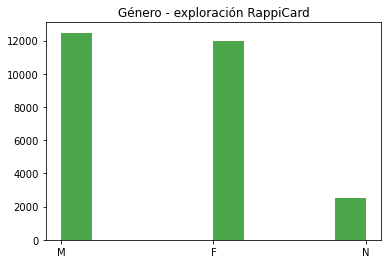

In [40]:
plt.hist(df.genero.values, color='g',alpha=0.7)
plt.title('Género - exploración RappiCard')
plt.savefig('RappiCard_exploracion_categorias_genero.png',format='png')

In [134]:
print('Genero de usuarios: ', usuarios.genero.value_counts())

Genero de usuarios:  M    1851
F    1784
N     365
Name: genero, dtype: int64


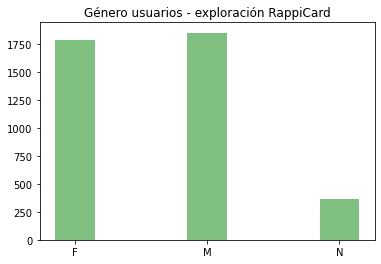

In [324]:
genero_usuarios = usuarios.groupby('genero',as_index=False).agg({'user_id':'count'})

fig, ax = plt.subplots()
ax.bar(genero_usuarios.genero.values, genero_usuarios.user_id.values, color='g',alpha=0.5, width=0.3)

ax.set_title('Género usuarios - exploración RappiCard')
plt.savefig('RappiCard_exploracion_categorias_genero_usuarios.png',format='png')

In [173]:
# Vemos la relación entre género y fraude
df[df.fraude == True].genero.value_counts()

F    371
M    359
N     80
Name: genero, dtype: int64

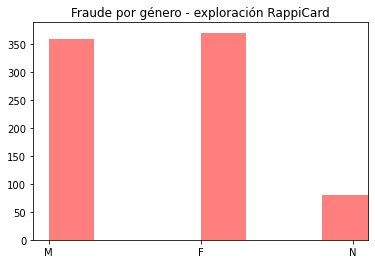

In [325]:
fig, ax = plt.subplots( )
ax.hist(df[df.fraude == True].genero.values, color='r',alpha=0.5, width=0.3)

ax.set_title('Fraude por género - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_genero.png',format='png')

## linea_tc

In [187]:
print('Línea tc:')
print(df.linea_tc.nunique())
print('Máximo: ',df.linea_tc.max(), 'Mínimo: ', df.linea_tc.min())
print('Nulos: ',df[df.linea_tc.isnull()].shape[0])

Línea tc:
75
Máximo:  99000 Mínimo:  25000
Nulos:  0


In [326]:
usuarios_info_tc = df.groupby(['user_id','linea_tc','interes_tc'], as_index=False).agg({'transaction_id':'count','fraude':max})

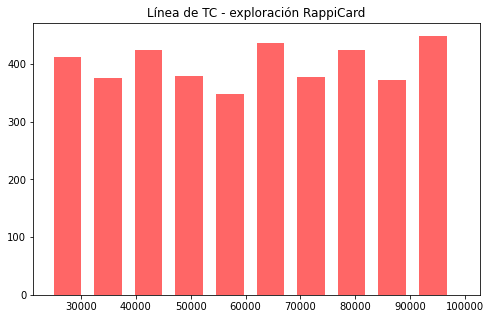

In [210]:
fig, ax = plt.subplots(figsize=(8,5) )
ax.hist(usuarios_info_tc.linea_tc.values, color='r',alpha=0.6, width=5050)

ax.set_title('Línea de TC - exploración RappiCard')
plt.savefig('RappiCard_exploracion_usuario_línea_tc.png',format='png')

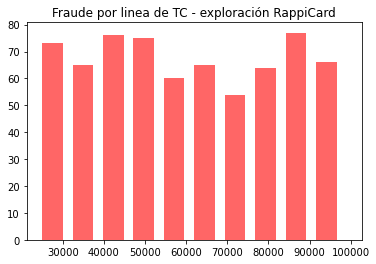

In [212]:
fig, ax = plt.subplots( )
ax.hist(usuarios_info_tc[usuarios_info_tc.fraude == True].linea_tc.values, color='r',alpha=0.6, width=5000)

ax.set_title('Fraude por linea de TC - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_línea_tc.png',format='png')

## interes_tc

In [363]:
print('Interés tc:')
print(df.interes_tc.nunique())
print(df.interes_tc.value_counts())
print('Nulos: ', df[(df.interes_tc.isnull()) |(df.interes_tc == 'null')].shape[0])
display(df.interes_tc.describe())

Interés tc:
33
58    1198
50     975
63     922
52     899
42     890
33     876
35     873
61     860
48     854
43     852
64     850
38     850
51     849
47     840
34     837
32     832
49     830
57     808
60     802
56     794
62     788
45     767
41     756
40     750
37     745
46     744
53     735
59     731
54     726
55     707
39     701
36     671
44     663
Name: interes_tc, dtype: int64
Nulos:  0


count    26975.000000
mean        48.224875
std          9.587256
min         32.000000
25%         40.000000
50%         48.000000
75%         57.000000
max         64.000000
Name: interes_tc, dtype: float64

In [57]:
interes = df.groupby('interes_tc',as_index=False).agg({'transaction_id':'count'})

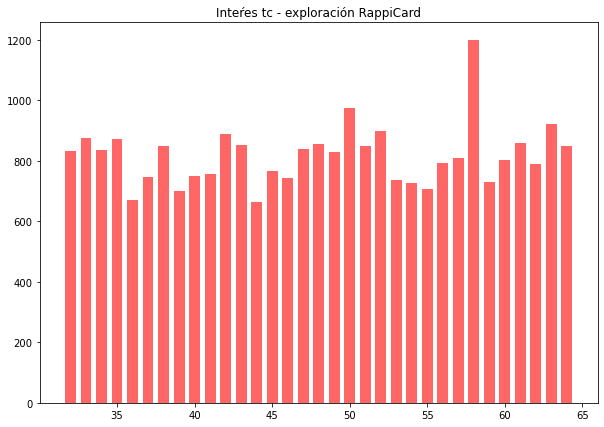

In [63]:
fig, ax = plt.subplots( figsize=(10,7))
ax.bar(interes.interes_tc.values, interes.transaction_id.values, color='r',alpha=0.6, width=0.7)

ax.set_title('Inteŕes tc - exploración RappiCard')
plt.savefig('RappiCard_exploracion_categorias_interes_tc.png',format='png')

## monto

In [364]:
print('Monto: ')
print('Máximo: ', df.monto.max(), 'Mínimo: ', df.monto.min())
print('Nulos: ', df[(df.monto.isnull()) |(df.monto == 'null')].shape[0])
print(df.monto.nunique())
display(df.monto.describe())

Monto: 
Máximo:  1712.7 Mínimo:  1.0
Nulos:  0
22677


count    26975.000000
mean       513.796463
std        290.342419
min          1.000000
25%        300.490000
50%        506.380000
75%        716.515000
max       1712.700000
Name: monto, dtype: float64

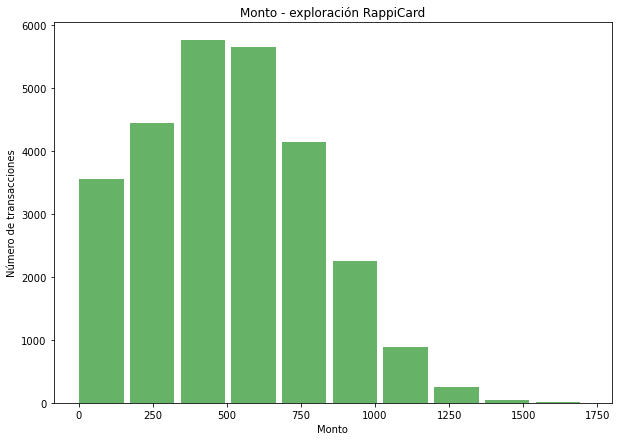

In [330]:
fig, ax = plt.subplots( figsize=(10,7))
ax.hist(df.monto.values, color='g',alpha=0.6, width=150)
ax.set_ylabel('Número de transacciones')
ax.set_xlabel('Monto')

plt.title('Monto - exploración RappiCard')
plt.savefig('RappiCard_exploracion_monto.png',format='png')

count     810.000000
mean      578.958272
std       319.178360
min         1.000000
25%       339.947500
50%       572.940000
75%       793.955000
max      1625.160000
Name: monto, dtype: float64


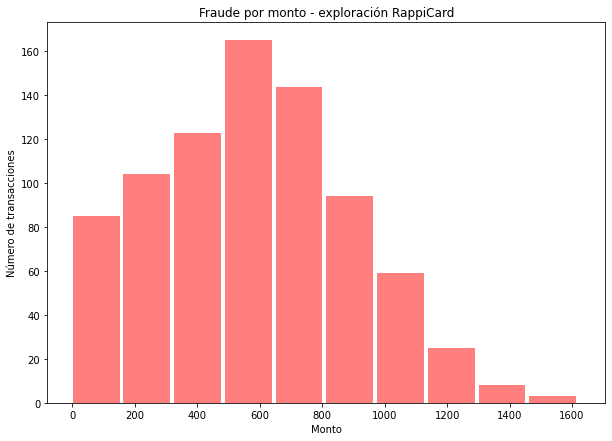

In [329]:
print(df[df.fraude == True].monto.describe())

fig, ax = plt.subplots( figsize=(10,7))
ax.hist(df[df.fraude == True].monto.values, color='r',alpha=0.5, width=150)
ax.set_ylabel('Número de transacciones')
ax.set_xlabel('Monto')

plt.title('Fraude por monto - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_monto.png',format='png')

In [226]:
print('Montos por 1 peso en general: ',df[df.monto == 1].shape[0])
print('Montos en casos de fraude por 1 peso : ',df[(df.fraude==True) &(df.monto == 1)].shape[0])

Montos por 1 peso en general:  1256
Montos en casos de fraude por 1 peso :  34


## fecha

In [365]:
print('Fecha: ')
print(df.fecha.nunique())
print('Nulos: ', df[(df.fecha.isnull()) |(df.fecha == 'null')].shape[0])
print('Fecha mínima: ',df.fecha.min(), 'fecha máxima:',df.fecha.max())

Fecha: 
29
Nulos:  0
Fecha mínima:  2020-01-02 00:00:00 fecha máxima: 2020-01-30 00:00:00


In [238]:
df['fecha'] =  pd.to_datetime(df['fecha'], format='%d/%m/%y')
df['dia_semana'] = df['fecha'].dt.dayofweek

In [283]:
fechas = df.groupby(['fecha','dia_semana'],as_index=False).agg({'transaction_id':'count'})
fechas['porcentaje'] = (fechas['transaction_id'] / fechas.transaction_id.sum())*100
fechas_fraude = df[df.fraude == True].groupby(['fecha','dia_semana'],as_index=False).agg({'transaction_id':'count'})
fechas_fraude['porcentaje'] = (fechas_fraude['transaction_id'] / fechas_fraude.transaction_id.sum())*100

In [280]:
print('Media transacciones por día: ', fechas.transaction_id.describe())
print('Mínimo: ', fechas.transaction_id.min(),(fechas.transaction_id.min()/fechas.transaction_id.sum())*100 , '%', fechas[fechas.transaction_id == fechas.transaction_id.min()], )
print('Máximo: ', fechas.transaction_id.max(),(fechas.transaction_id.max()/fechas.transaction_id.sum())*100 , '%',fechas[fechas.transaction_id == fechas.transaction_id.max()])

Media transacciones por día:  count     29.000000
mean     930.172414
std       25.132604
min      869.000000
25%      916.000000
50%      933.000000
75%      946.000000
max      977.000000
Name: transaction_id, dtype: float64
Mínimo:  869 3.2215013901760887 %        fecha  transaction_id  porcentaje
8 2020-01-10             869    3.221501
Máximo:  977 3.6218721037998147 %         fecha  transaction_id  porcentaje
27 2020-01-29             977    3.621872


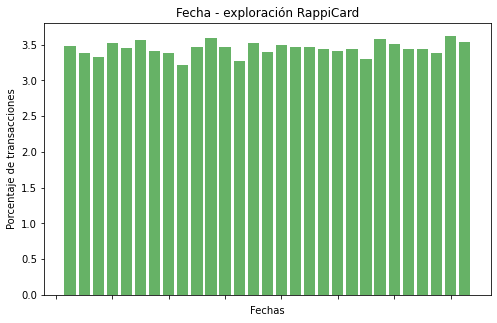

In [331]:
fig, ax = plt.subplots( figsize=(8,5))
ax.bar(fechas.fecha.values,fechas.porcentaje.values ,color='g',alpha=0.6)
ax.set_xticklabels([])
ax.set_ylabel('Porcentaje de transacciones')
ax.set_xlabel('Fechas')

plt.title('Fecha - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fecha.png',format='png')

In [281]:
print('Media transacciones por día: ', fechas_fraude.transaction_id.describe())
print('Mínimo: ', fechas_fraude.transaction_id.min(),(fechas_fraude.transaction_id.min()/fechas_fraude.transaction_id.sum())*100 , '%', fechas_fraude[fechas_fraude.transaction_id == fechas_fraude.transaction_id.min()] )
print('Máximo: ', fechas_fraude.transaction_id.max(),(fechas_fraude.transaction_id.max()/fechas_fraude.transaction_id.sum())*100 , '%',fechas_fraude[fechas_fraude.transaction_id == fechas_fraude.transaction_id.max()])

Media transacciones por día:  count    29.000000
mean     27.931034
std       4.300590
min      18.000000
25%      25.000000
50%      28.000000
75%      31.000000
max      36.000000
Name: transaction_id, dtype: float64
Mínimo:  18 2.2222222222222223 %        fecha  transaction_id  porcentaje
8 2020-01-10              18    2.222222
Máximo:  36 4.444444444444445 %         fecha  transaction_id  porcentaje
14 2020-01-16              36    4.444444


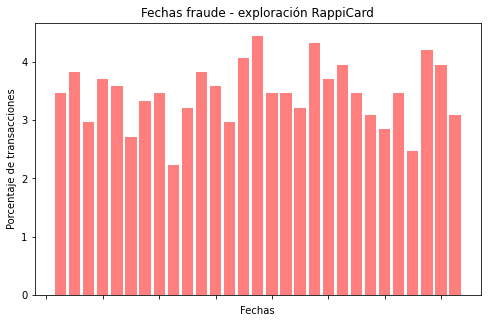

In [332]:
fig, ax = plt.subplots( figsize=(8,5))
ax.bar(fechas_fraude.fecha.values,fechas_fraude.porcentaje.values, color='r',alpha=0.5)
ax.set_xticklabels([])
ax.set_ylabel('Porcentaje de transacciones')
ax.set_xlabel('Fechas')

plt.title('Fechas fraude - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_fecha.png',format='png')

### Fecha- Día de la semana

In [344]:
dia_semana = df.groupby(['dia_semana'],as_index=False).agg({'transaction_id':'count'})
dia_semana.loc[dia_semana.dia_semana == 3, 'transaction_id'] = dia_semana['transaction_id']/5
dia_semana.loc[dia_semana.dia_semana != 3, 'transaction_id'] = dia_semana['transaction_id']/4
dia_semana['porcentaje'] = (dia_semana['transaction_id']/dia_semana.transaction_id.sum())*100
dia_semana_fraude = df[df.fraude==True].groupby(['dia_semana'],as_index=False).agg({'transaction_id':'count'})
dia_semana_fraude.loc[dia_semana_fraude.dia_semana == 3, 'transaction_id'] = dia_semana_fraude['transaction_id']/5
dia_semana_fraude.loc[dia_semana_fraude.dia_semana != 3, 'transaction_id'] = dia_semana_fraude['transaction_id']/4

dia_semana_fraude['porcentaje'] = (dia_semana_fraude['transaction_id']/dia_semana_fraude.transaction_id.sum())*100

In [345]:
print('Descripción día de la semana: ',dia_semana.transaction_id.describe())
print('Descripción fraude por día de la semana: ',dia_semana_fraude.transaction_id.describe())

Descripción día de la semana:  count      7.000000
mean     930.442857
std       10.334103
min      919.750000
25%      922.425000
50%      929.000000
75%      937.250000
max      945.000000
Name: transaction_id, dtype: float64
Descripción fraude por día de la semana:  count     7.000000
mean     27.892857
std       2.025140
min      25.250000
25%      26.500000
50%      28.250000
75%      28.875000
max      31.000000
Name: transaction_id, dtype: float64


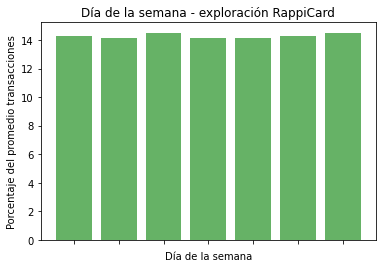

In [346]:
fig, ax = plt.subplots( )
ax.bar(dia_semana.dia_semana.values,dia_semana.porcentaje.values, color='g',alpha=0.6)
ax.set_xticklabels([])
ax.set_ylabel('Porcentaje del promedio transacciones')
ax.set_xlabel('Día de la semana')

plt.title('Día de la semana - exploración RappiCard')
plt.savefig('RappiCard_exploracion_dia_semana.png',format='png')

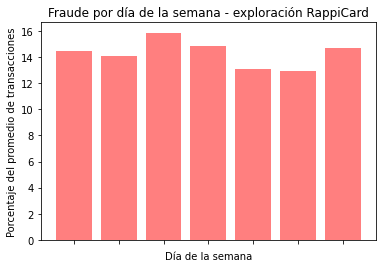

In [347]:
fig, ax = plt.subplots( )
ax.bar(dia_semana_fraude.dia_semana.values,dia_semana_fraude.porcentaje.values, color='r',alpha=0.5)
ax.set_xticklabels([])
ax.set_ylabel('Porcentaje del promedio de transacciones')
ax.set_xlabel('Día de la semana')

plt.title('Fraude por día de la semana - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_dia_semana.png',format='png')

## Hora

In [366]:
print('Hora: ')
print(df.hora.nunique())
print('Nulos: ', df[(df.hora.isnull()) |(df.hora == 'null')].shape[0])
print(df.hora.value_counts())

Hora: 
24
Nulos:  0
15    1793
13    1792
14    1760
12    1720
16    1699
11    1661
10    1529
17    1519
9     1349
18    1329
19    1252
8     1198
20    1053
7      995
21     854
6      816
22     715
5      703
23     631
4      580
0      528
3      527
1      496
2      476
Name: hora, dtype: int64


In [317]:
hora = df.groupby('hora',as_index=False).agg({'transaction_id':'count'})
hora['porcentaje'] = (hora['transaction_id'] / hora.transaction_id.sum())*100
hora_fraude =  df[df.fraude==True].groupby('hora',as_index=False).agg({'transaction_id':'count'})
hora_fraude['porcentaje'] = (hora_fraude['transaction_id'] / hora_fraude.transaction_id.sum())*100

In [322]:
print('Descripción horas de transacciones: ',hora.transaction_id.describe())

Descripción horas de transacciones:  count      24.000000
mean     1123.958333
std       480.304114
min       476.000000
25%       685.000000
50%      1125.500000
75%      1562.000000
max      1793.000000
Name: transaction_id, dtype: float64


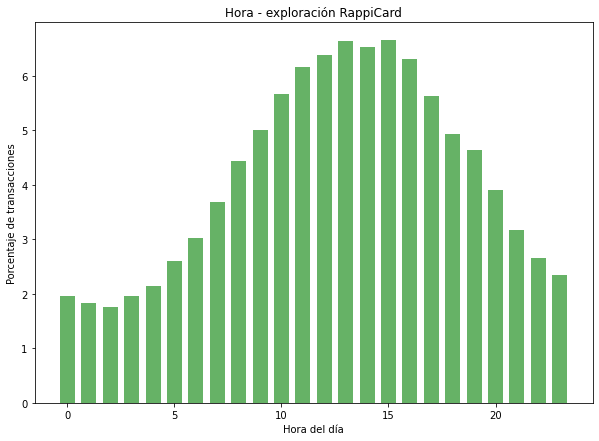

In [348]:
fig, ax = plt.subplots( figsize=(10,7))
ax.bar(hora.hora.values, hora.porcentaje.values, color='g',alpha=0.6, width=0.7)
ax.set_ylabel('Porcentaje de transacciones')
ax.set_xlabel('Hora del día')

ax.set_title('Hora - exploración RappiCard')
plt.savefig('RappiCard_exploracion_hora.png',format='png')

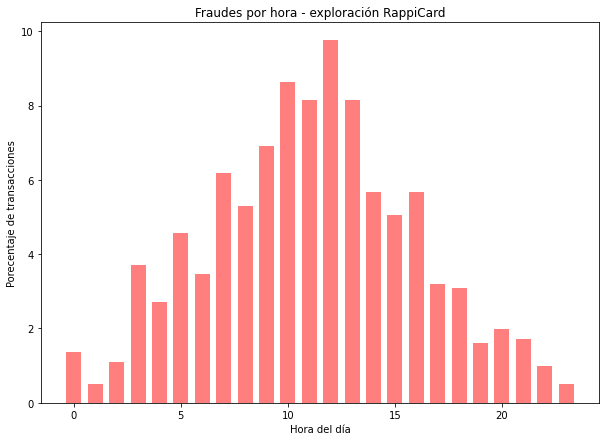

In [349]:
fig, ax = plt.subplots( figsize=(10,7))
ax.bar(hora_fraude.hora.values, hora_fraude.porcentaje.values, color='r',alpha=0.5, width=0.7)
ax.set_ylabel('Porecentaje de transacciones')
ax.set_xlabel('Hora del día')

ax.set_title('Fraudes por hora - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_hora.png',format='png')

In [413]:
df['momento_de_dia'] = 0
df.loc[(df.hora > 6)&(df.hora <= 12) ,'momento_de_dia'] = 'maniana'
df.loc[(df.hora > 12)&(df.hora <= 20) ,'momento_de_dia'] = 'tarde'
df.loc[(df.hora > 20)|(df.hora <= 6) ,'momento_de_dia'] = 'noche'

print(df.shape)
print(df[df.momento_de_dia ==0].shape[0])
print(df.momento_de_dia.value_counts())
print('Fraudes por momento del día: ', df[df.fraude==True].momento_de_dia.value_counts())

(26975, 17)
0
tarde      12197
maniana     8452
noche       6326
Name: momento_de_dia, dtype: int64
Fraudes por momento del día:  maniana    364
tarde      279
noche      167
Name: momento_de_dia, dtype: int64


## Dispositivo

In [367]:
print('Columna dispositivo: ')
print(df.dispositivo.nunique())
print('Nulos: ', df[(df.dispositivo.isnull()) |(df.dispositivo == 'null')].shape[0])
print('Año del dispositivo, únicos: ',df.dispositivo_anio.nunique(), df.dispositivo_anio.unique())
print('Proveedor del dispositivo, únicos: ',df.dispositivo_proveedor.nunique(),df.dispositivo_proveedor.value_counts() )
print('Marca del dispositivo, únicos: ',df.dispositivo_marca.nunique(), df.dispositivo_marca.value_counts())

Columna dispositivo: 
130
Nulos:  0
Año del dispositivo, únicos:  12 [2019 2021 2017 2020 2018 2015 2014 2016 2022 2013 2012 2011]
Proveedor del dispositivo, únicos:  3  Telcel      12814
 ATT          8659
 Movistar     5502
Name: dispositivo_proveedor, dtype: int64
Marca del dispositivo, únicos:  4  Samsung     8994
 Motorola    6478
 Huawei      6324
 Apple       5179
Name: dispositivo_marca, dtype: int64


#### Marca

In [433]:
marca = df.groupby(['dispositivo_marca'],as_index=False).agg({'transaction_id':'count'})
marca['porcentaje'] = (marca['transaction_id']/marca.transaction_id.sum())*100
marca_fraude = df[df.fraude==True].groupby(['dispositivo_marca'], as_index=False).agg({'transaction_id':'count'})
marca_fraude['porcentaje'] = (marca_fraude['transaction_id']/marca_fraude.transaction_id.sum())*100

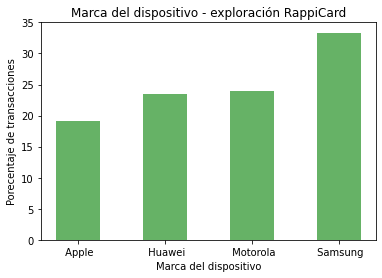

In [431]:
fig, ax = plt.subplots()
ax.bar(marca.dispositivo_marca.values, marca.porcentaje.values, color='g',alpha=0.6, width=0.5)
ax.set_ylabel('Porecentaje de transacciones')
ax.set_xlabel('Marca del dispositivo')

ax.set_title('Marca del dispositivo - exploración RappiCard')
plt.savefig('RappiCard_exploracion_marca_dispositivo.png',format='png')

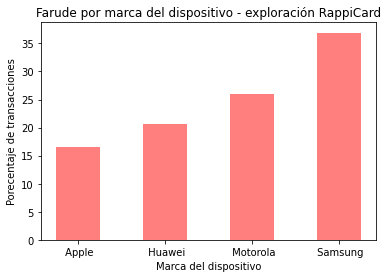

In [434]:
fig, ax = plt.subplots()
ax.bar(marca_fraude.dispositivo_marca.values, marca_fraude.porcentaje.values, color='r',alpha=0.5, width=0.5)
ax.set_ylabel('Porecentaje de transacciones')
ax.set_xlabel('Marca del dispositivo')

ax.set_title('Farude por marca del dispositivo - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_marca_dispositivo.png',format='png')

#### Proveedor

In [440]:
proveedor = df.groupby(['dispositivo_proveedor'], as_index=False).agg({'transaction_id':'count'})
proveedor['porcentaje'] = (proveedor['transaction_id']/proveedor.transaction_id.sum())*100
proveedor_fraude = df[df.fraude==True].groupby(['dispositivo_proveedor'],as_index=False).agg({'transaction_id':'count'})
proveedor_fraude['porcentaje'] = (proveedor_fraude['transaction_id']/proveedor_fraude.transaction_id.sum())*100

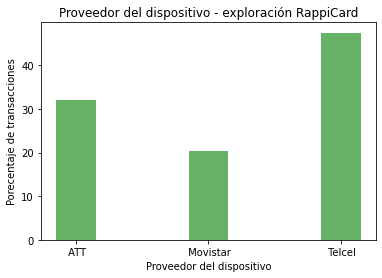

In [438]:
fig, ax = plt.subplots()
ax.bar(proveedor.dispositivo_proveedor.values, proveedor.porcentaje.values, color='g',alpha=0.6, width=0.3)
ax.set_ylabel('Porecentaje de transacciones')
ax.set_xlabel('Proveedor del dispositivo')

ax.set_title('Proveedor del dispositivo - exploración RappiCard')
plt.savefig('RappiCard_exploracion_proveedor_dispositivo.png',format='png')

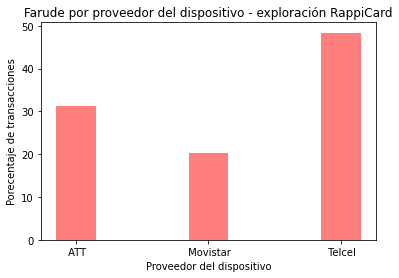

In [442]:
fig, ax = plt.subplots()
ax.bar(proveedor_fraude.dispositivo_proveedor.values, proveedor_fraude.porcentaje.values, color='r',alpha=0.5, width=0.3)
ax.set_ylabel('Porecentaje de transacciones')
ax.set_xlabel('Proveedor del dispositivo')

ax.set_title('Farude por proveedor del dispositivo - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_proveddor_dispositivo.png',format='png')

#### Año

In [443]:
anio = df.groupby(['dispositivo_anio'], as_index=False).agg({'transaction_id':'count'})
anio['porcentaje'] = (anio['transaction_id']/anio.transaction_id.sum())*100
anio_fraude = df[df.fraude==True].groupby(['dispositivo_anio'], as_index=False).agg({'transaction_id':'count'})
anio_fraude['porcentaje'] = (anio_fraude['transaction_id']/anio_fraude.transaction_id.sum())*100

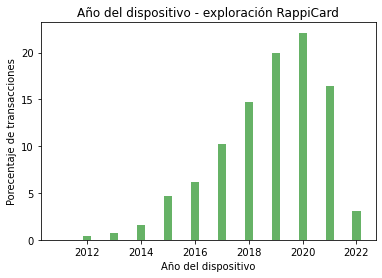

In [445]:
fig, ax = plt.subplots()
ax.bar(anio.dispositivo_anio.values, anio.porcentaje.values, color='g',alpha=0.6, width=0.3)
ax.set_ylabel('Porecentaje de transacciones')
ax.set_xlabel('Año del dispositivo')

ax.set_title('Año del dispositivo - exploración RappiCard')
plt.savefig('RappiCard_exploracion_anio_dispositivo.png',format='png')

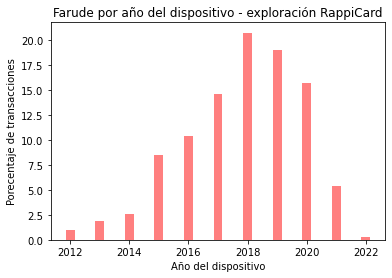

In [444]:
fig, ax = plt.subplots()
ax.bar(anio_fraude.dispositivo_anio.values, anio_fraude.porcentaje.values, color='r',alpha=0.5, width=0.3)
ax.set_ylabel('Porecentaje de transacciones')
ax.set_xlabel('Año del dispositivo')

ax.set_title('Farude por año del dispositivo - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_anio_dispositivo.png',format='png')

## Establecimiento

In [360]:
print('Establecimientos: ')
print(df.establecimiento.nunique())
print(df.establecimiento.value_counts())
print('Nulos: ', df[(df.establecimiento.isnull()) |(df.establecimiento == 'null')].shape[0])

Establecimientos: 
5
Tienda departamental    6932
Compra en línea         6615
Farmacia                4147
Supermercado            4017
Abarrotes               2325
Name: establecimiento, dtype: int64
Nulos:  2939


In [355]:
establecimiento = df.groupby('establecimiento',as_index=False).agg({'transaction_id':'count'})
establecimiento['porcentaje'] = (establecimiento['transaction_id']/establecimiento.transaction_id.sum())*100
establecimiento_fraude = df[df.fraude == True].groupby('establecimiento',as_index=False).agg({'transaction_id':'count'})
establecimiento_fraude['porcentaje'] = (establecimiento_fraude['transaction_id']/establecimiento_fraude.transaction_id.sum())*100

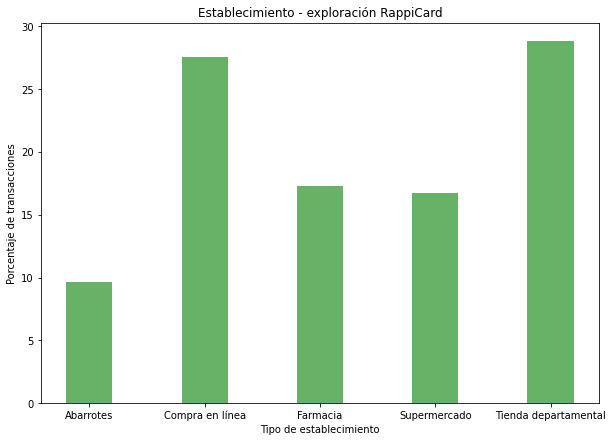

In [356]:
fig, ax = plt.subplots( figsize=(10,7))
ax.bar(establecimiento.establecimiento.values, establecimiento.porcentaje.values, color='g',alpha=0.6, width=0.4)
ax.set_ylabel('Porcentaje de transacciones')
ax.set_xlabel('Tipo de establecimiento')

ax.set_title('Establecimiento - exploración RappiCard')
plt.savefig('RappiCard_exploracion_establecimiento.png',format='png')

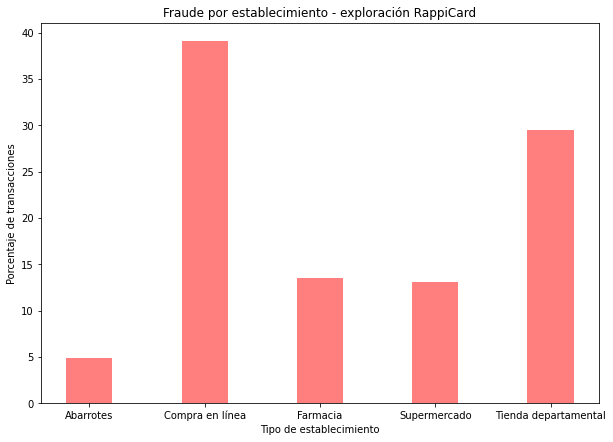

In [357]:
fig, ax = plt.subplots( figsize=(10,7))
ax.bar(establecimiento_fraude.establecimiento.values, establecimiento_fraude.porcentaje.values, color='r',alpha=0.5, width=0.4)
ax.set_ylabel('Porcentaje de transacciones')
ax.set_xlabel('Tipo de establecimiento')

ax.set_title('Fraude por establecimiento - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_establecimiento.png',format='png')

## Ciudad

In [373]:
print('Ciudad: ')
print(df.ciudad.nunique())
print('Nulos: ',  df[(df.ciudad.isnull()) |(df.ciudad == 'null')].shape[0])
print(df.ciudad.value_counts())

Ciudad: 
7
Nulos:  334
Monterrey           6672
Guadalajara         6024
Nezahualcóyotl      4313
Ciudad de México    4101
Tijuana             2372
Cancún              1604
Toluca              1555
Name: ciudad, dtype: int64


In [382]:
ciudad = df.groupby('ciudad',as_index=False).agg({'transaction_id':'count'})
ciudad['porcentaje'] = (ciudad['transaction_id']/ciudad.transaction_id.sum())*100
ciudad_fraude = df[df.fraude==True].groupby('ciudad',as_index=False).agg({'transaction_id':'count'})
ciudad_fraude['porcentaje'] = (ciudad_fraude['transaction_id']/ciudad_fraude.transaction_id.sum())*100

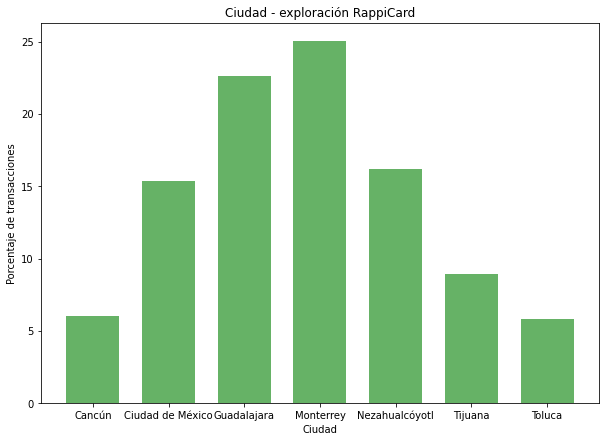

In [384]:
fig, ax = plt.subplots( figsize=(10,7))
ax.bar(ciudad.ciudad.values, ciudad.porcentaje.values, color='g',alpha=0.6, width=0.7)
ax.set_ylabel('Porcentaje de transacciones')
ax.set_xlabel('Ciudad')

ax.set_title('Ciudad - exploración RappiCard')
plt.savefig('RappiCard_exploracion_ciudad.png',format='png')

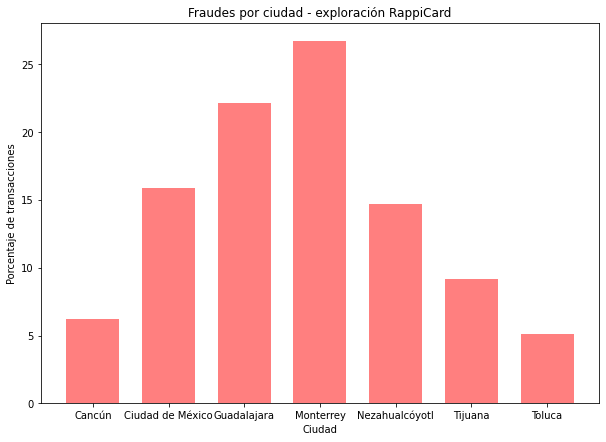

In [383]:
fig, ax = plt.subplots( figsize=(10,7))
ax.bar(ciudad_fraude.ciudad.values, ciudad_fraude.porcentaje.values, color='r',alpha=0.5, width=0.7)
ax.set_ylabel('Porcentaje de transacciones')
ax.set_xlabel('Ciudad')

ax.set_title('Fraudes por ciudad - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_ciudad.png',format='png')

Ciudad de México
Cancún
Tijuana
Monterrey
Toluca
Guadalajara
Nezahualcóyotl


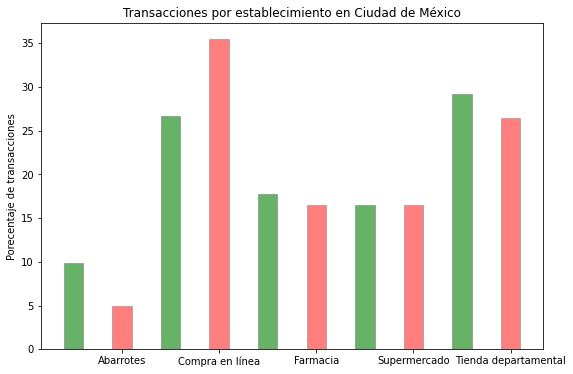

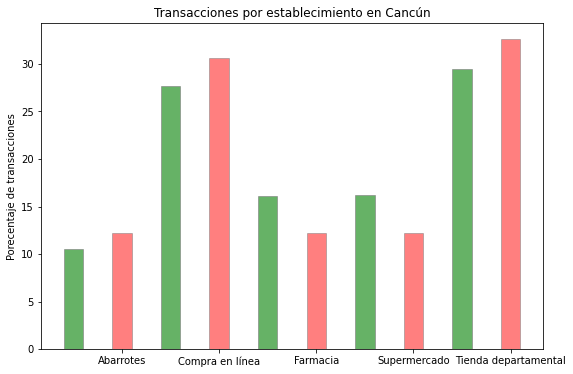

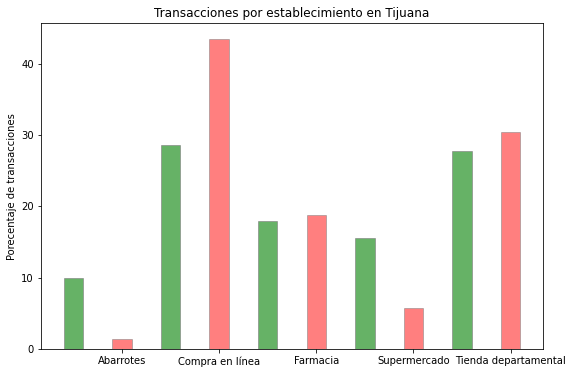

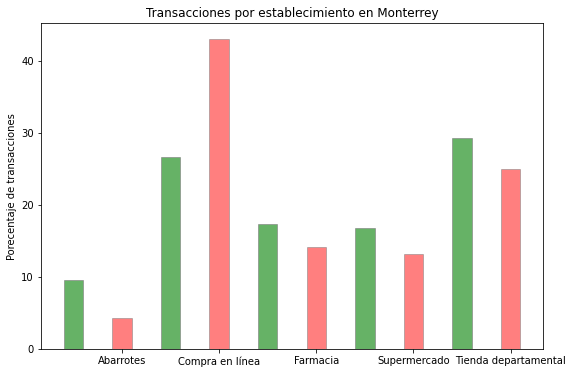

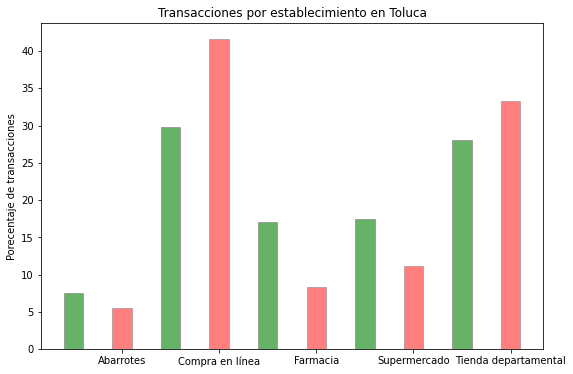

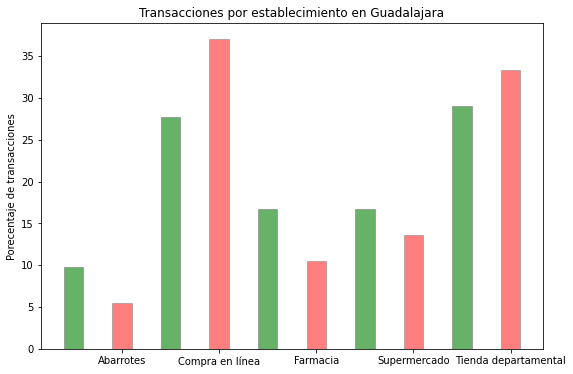

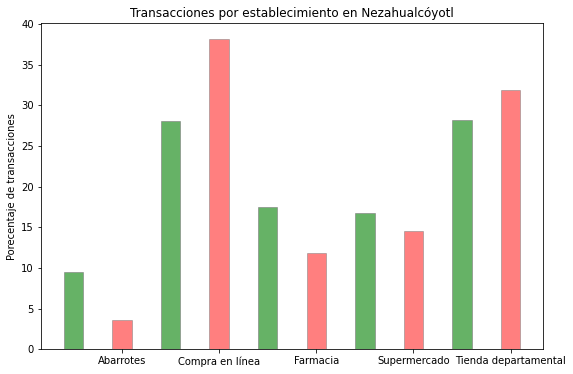

In [474]:
for cd in df[~df.ciudad.isnull()].ciudad.unique():
    print(cd)
    fig = plt.subplots(figsize=(9,6))
    
    cd_txn = df[(df.ciudad == cd)].groupby(['establecimiento'],as_index=False).agg({'transaction_id':'count'})
    cd_txn['porcentaje'] = (cd_txn['transaction_id']/cd_txn.transaction_id.sum())*100
    cd_txn_fraude = df[(df.ciudad == cd) &(df.fraude ==True)].groupby(['establecimiento'],as_index=False).agg({'transaction_id':'count'})
    cd_txn_fraude['porcentaje'] = (cd_txn_fraude['transaction_id']/cd_txn_fraude.transaction_id.sum())*100
    
    barWidth = 0.5
    br1 = np.arange(cd_txn.shape[0])
    br2 = [x + barWidth for x in br1]

    
    plt.bar(br1 , cd_txn.porcentaje.values, color ='g',alpha=0.6, width = 0.2,
        edgecolor ='grey', label ='SF')
    plt.bar(br2 , cd_txn_fraude.porcentaje.values, color ='r', alpha =0.5, width = 0.2,
        edgecolor ='grey', label ='CF')
    
    plt.ylabel('Porecentaje de transacciones')
    plt.title('Transacciones por establecimiento en ' + cd)
    plt.xticks([r + barWidth for r in range(cd_txn.shape[0])],
        cd_txn.establecimiento.unique().tolist())
    plt.savefig('RappiCard_exploracion_establecimiento_'+cd+'.png',format='png')
    

## Status_txn

In [389]:
print('Estatus de la transacción')
print(df.status_txn.nunique())
print('Nulos: ',  df[(df.status_txn.isnull()) |(df.status_txn == 'null')].shape[0])
print(df.status_txn.value_counts())


Estatus de la transacción
3
Nulos:  0
Aceptada      18844
En proceso     5341
Rechazada      2790
Name: status_txn, dtype: int64


In [390]:
estatus = df.groupby('status_txn',as_index=False).agg({'transaction_id':'count'})
estatus_fraude = df[df.fraude == True].groupby('status_txn',as_index=False).agg({'transaction_id':'count'})

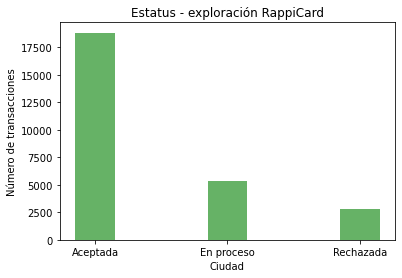

In [391]:
fig, ax = plt.subplots()
ax.bar(estatus.status_txn.values, estatus.transaction_id.values, color='g',alpha=0.6, width=0.3)
ax.set_ylabel('Número de transacciones')
ax.set_xlabel('Estatus de la transacción')

ax.set_title('Estatus - exploración RappiCard')
plt.savefig('RappiCard_exploracion_estatus.png',format='png')

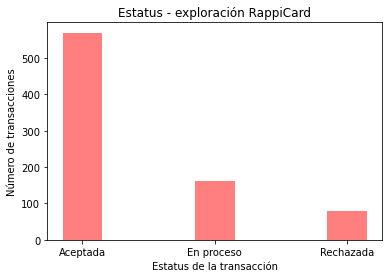

In [393]:
fig, ax = plt.subplots()
ax.bar(estatus_fraude.status_txn.values, estatus_fraude.transaction_id.values, color='r',alpha=0.5, width=0.3)
ax.set_ylabel('Número de transacciones')
ax.set_xlabel('Estatus de la transacción')

ax.set_title('Estatus - exploración RappiCard')
plt.savefig('RappiCard_exploracion_fraude_estatus.png',format='png')

## is_prime

In [395]:
print('Is prime unicos: ')
print(df.is_prime.nunique())
print('Nnulos: ',df[(df.is_prime.isnull()) |(df.is_prime == 'null')].shape[0] )
print(df.is_prime.value_counts())
print('Prime con fraude: ', df[df.fraude == True].is_prime.value_counts())

Is prime unicos: 
2
Nnulos:  0
False    23416
True      3559
Name: is_prime, dtype: int64
Prime con fraude:  False    710
True     100
Name: is_prime, dtype: int64


## dcto

In [400]:
print(df.dcto.nunique())
print('Nulos: ', df[(df.dcto.isnull()) |(df.dcto == 'null')].shape[0])
print('Con descuento: ',df[df.dcto != 0].shape[0], 'Sin descuento: ',df[df.dcto == 0].shape[0] )
print('Descripción de los que tienen descuento: ',df[df.dcto != 0].dcto.describe())

3326
Nulos:  0
Con descuento:  5704 Sin descuento:  21271
Descripción de los que tienen descuento:  count    5704.000000
mean       25.392994
std        14.478431
min         0.050000
25%        14.830000
50%        24.890000
75%        35.672500
max        85.640000
Name: dcto, dtype: float64


## Cashback

In [398]:
print('Cashback:' )
print(df.cashback.nunique())
print('Nulos: ', df[(df.cashback.isnull()) |(df.cashback == 'null')].shape[0])
print('Máximo cashback: ', df.cashback.max(), 'Mínimo cashback: ', df.cashback.min())

Cashback:
4452
Nulos:  0
Máximo cashback:  109.73 Mínimo cashback:  0.03


### Fraude

In [122]:
print('Fraude: ')
print(df.fraude.value_counts())

Fraude: 
False    26165
True       810
Name: fraude, dtype: int64


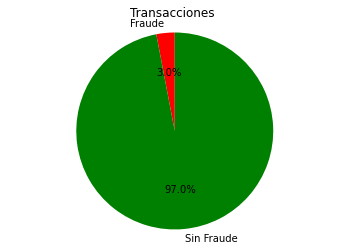

In [477]:
labels = ['Fraude', 'Sin Fraude']

s0 = df[df.fraude == True ].shape[0]
s1 = df[df.fraude == False ].shape[0]

sizes = [s0,s1]
colors = ['r','g']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')
plt.title('Transacciones ')
plt.savefig('RappiCard-Exploracion_fraudes.png',format='png')

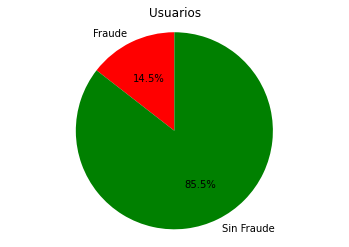

In [479]:
labels = ['Fraude', 'Sin Fraude']

s0 = df[df.fraude == True ].user_id.nunique()
s1 = df[df.fraude == False ].user_id.nunique()

sizes = [s0,s1]
colors = ['r','g']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')
plt.title('Usuarios')
plt.savefig('RappiCard-Exploracion_fraudes_usuarios.png',format='png')